# Which activities are associated with each other in Finnish population?

In [106]:
import csv as C
import numpy as N
import pandas as P
import matplotlib as M
import scipy as S
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import ttest_ind, ttest_rel
from scipy.stats import shapiro
from scipy.stats import wilcoxon
from scipy.stats import mannwhitneyu
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import kruskal
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
from scipy.stats import pointbiserialr

import statsmodels
from statsmodels.stats import multitest



In [107]:
df = P.read_csv('habits-cleaned.csv')

In [108]:
df.head

<bound method NDFrame.head of      Unnamed: 0  kohde  jasen  pvknro  sp  ASALUE  IKAL1   A1   A2  A3   A4  \
0             0  50002      1       1   1     1.0     49    0  560   0   80   
1             1  50002      1       2   1     1.0     49  380  450  10    0   
2             2  50003      1       1   2     2.0     41    0  470  30  100   
3             3  50003      1       2   2     2.0     41    0  550   0    0   
4             4  50004      2       1   1     1.0     62  640  410   0    0   
..          ...    ...    ...     ...  ..     ...    ...  ...  ...  ..  ...   
625         738  51973      1       2   1     2.0     41    0  620   0  108   
626         739  51980      1       1   2     2.0     50    0  570   0    0   
627         740  51980      1       2   2     2.0     50  460  450  31    0   
628         743  51983      1       1   2     3.0     66  560  375  20    0   
629         744  51983      1       2   2     3.0     66    0  435  31    0   

      A5  IKAL1_group

In [109]:
activity_cols = ["A1", "A2", "A3", "A4", "A5"]

df_activities = df[activity_cols].replace({1: 1, 2: 0}) # make A5 into binary
df_activities.head()

,A1,A2,A3,A4,A5
0,0,560,0,80,1.0
1,380,450,10,0,1.0
2,0,470,30,100,1.0
3,0,550,0,0,1.0
4,640,410,0,0,1.0


# Correlation matrix for all activities

In [110]:
corr = df_activities.corr()
corr

,A1,A2,A3,A4,A5
A1,1.000000,-0.378758,-0.197356,-0.021408,0.019540
A2,-0.378758,1.000000,-0.042460,0.036885,0.024417
A3,-0.197356,-0.042460,1.000000,-0.038453,0.018875
A4,-0.021408,0.036885,-0.038453,1.000000,0.018195
A5,0.019540,0.024417,0.018875,0.018195,1.000000


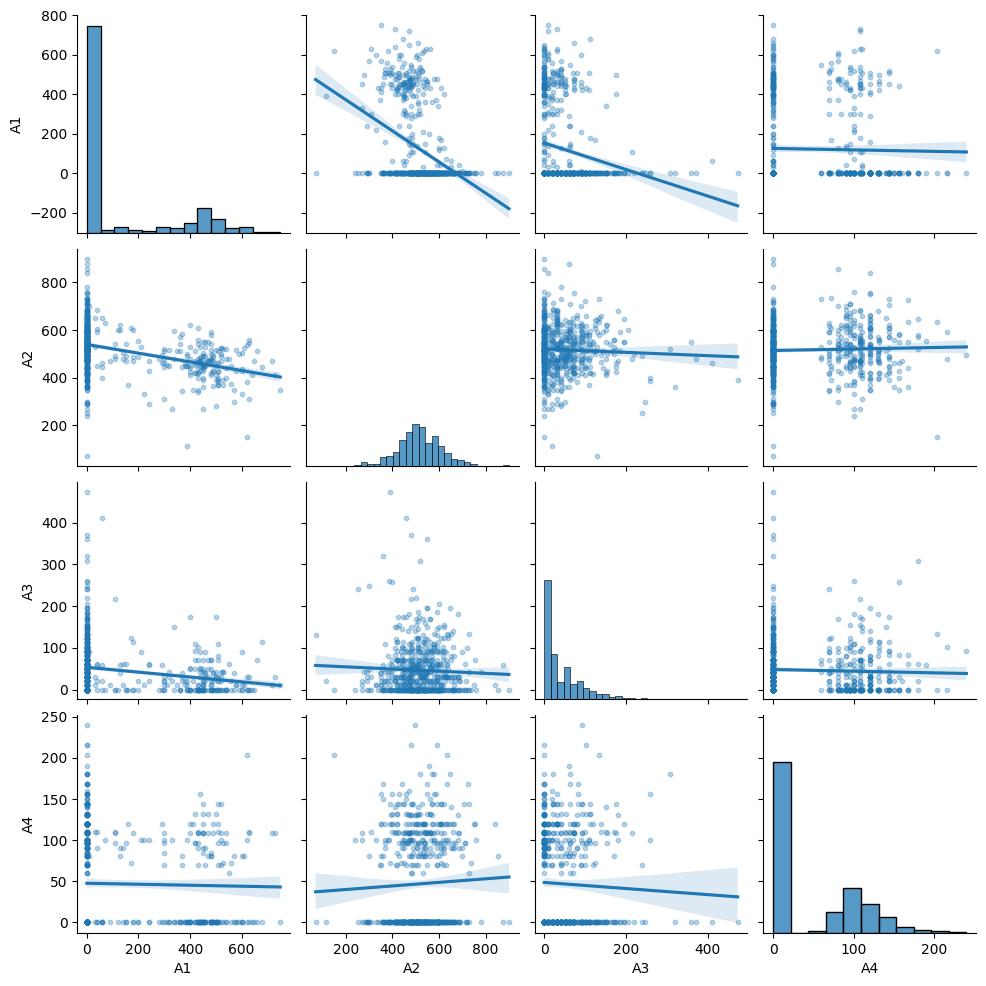

In [123]:
sns.pairplot(df_activities[['A1','A2','A3','A4']]  # pairplot for the continuous A1-A4
             , kind='reg'
             , diag_kind='hist'
             , plot_kws={'scatter_kws': {'alpha':0.3, 's':10}})

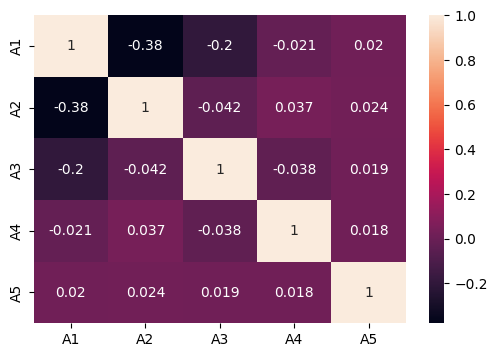

In [116]:
plt.figure(figsize=(6,4))

sns.heatmap(corr, annot=True)

plt.show()

### A1 - A2 shows negative correlation of -0.38 -> test correlation of people working more sleep less

# Work vs Sleep (A1 - A2)

In [91]:
r, p = pearsonr(df['A1'], df['A2'])
r, p

(np.float64(-0.37875774491328235), np.float64(6.361710412648064e-23))

In [92]:
r, p = spearmanr(df['A1'], df['A2'])
r, p

(np.float64(-0.3976145050343014), np.float64(2.7037505192901285e-25))

### Shows significant correlation from both tests, p = very small number

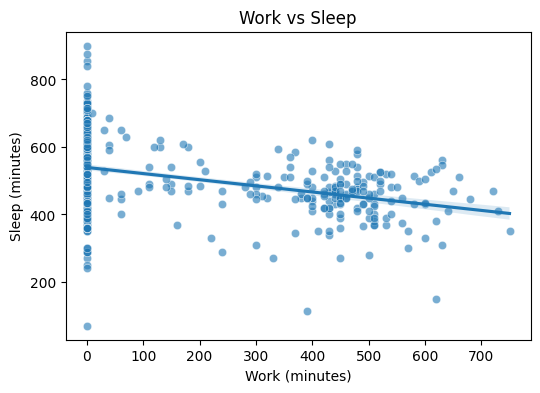

In [93]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='A1', y='A2', data=df, alpha=0.6)
sns.regplot(x='A1', y='A2', data=df, scatter=False)
plt.xlabel('Work (minutes)')
plt.ylabel('Sleep (minutes)')
plt.title('Work vs Sleep')
plt.show()

The variable 'A1' is very zero-inflated as not everyone works everyday -> test sleep on workdays only


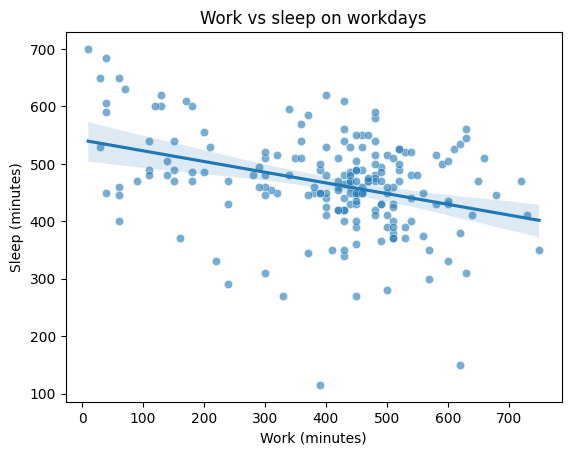

In [94]:
workdays = df[df['A1'] > 0]

sns.scatterplot(x='A1', y='A2', data=workdays, alpha=0.6)
sns.regplot(x='A1', y='A2', data=workdays, scatter=False)
plt.title('Work vs sleep on workdays')
plt.xlabel('Work (minutes)')
plt.ylabel('Sleep (minutes)')
plt.show()

In [95]:
# Correlation for workdays and sleep
pearsonr(workdays['A1'], workdays['A2'])

PearsonRResult(statistic=np.float64(-0.3571568582184129), pvalue=np.float64(3.9388574142481047e-07))

### The correlation remains negative for workdays (-0.357), significant --> people tend to sleep less when working more

Workdays sleep vs days off sleep

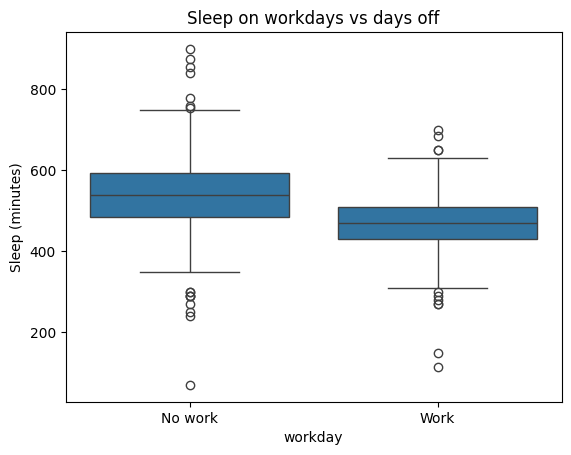

In [96]:
df['workday'] = (df['A1'] > 0).astype(int) # make new col indicating workday

sns.boxplot(x='workday', y='A2', data=df)
plt.xticks([0,1], ['No work', 'Work'])
plt.title('Sleep on workdays vs days off')
plt.ylabel('Sleep (minutes)')
plt.show()

In [97]:
ttest_ind(df[df['workday']==1]['A2'],
          df[df['workday']==0]['A2'],
          equal_var=False)

TtestResult(statistic=np.float64(-9.557358665751297), pvalue=np.float64(1.1157252532257631e-19), df=np.float64(411.3948903608943))

### -> Clearly people tend to sleep less on workdays than on days off

# Reading effects on sleep / work (A1 & A2 - A3)

In [98]:
r, p = pearsonr(df['A1'], df['A3']) # shows that people who work tend to have less time to read. (r = -0.2), p significant
r, p

(np.float64(-0.1973559757835926), np.float64(5.946492981305712e-07))

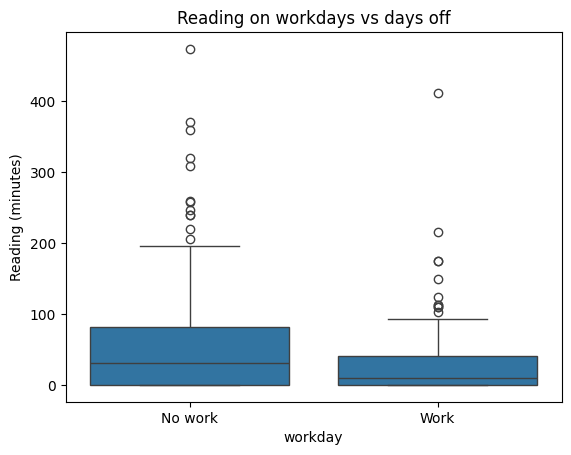

In [99]:
sns.boxplot(x='workday', y='A3', data=df) # use the same workday col from previous
plt.xticks([0,1], ['No work', 'Work'])
plt.title('Reading on workdays vs days off')
plt.ylabel('Reading (minutes)')
plt.show()

In [100]:
r, p = pearsonr(df['A2'], df['A3']) # no significant correlation between sleep and reading
r, p

(np.float64(-0.04246048080942799), np.float64(0.28727749844264416))